In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Applying Z-Score Technique to Normal Distributed Column.

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: ylabel='Density'>

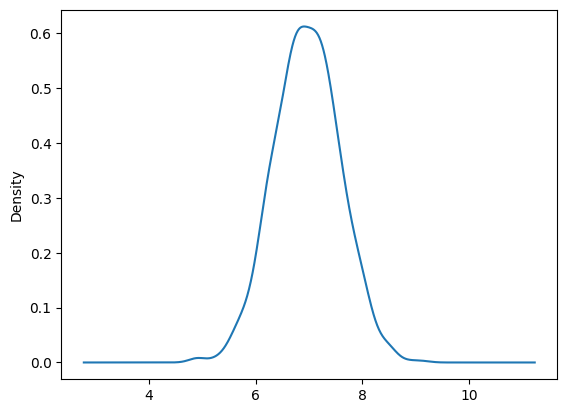

In [4]:
df['cgpa'].plot(kind='kde')

<Axes: ylabel='Density'>

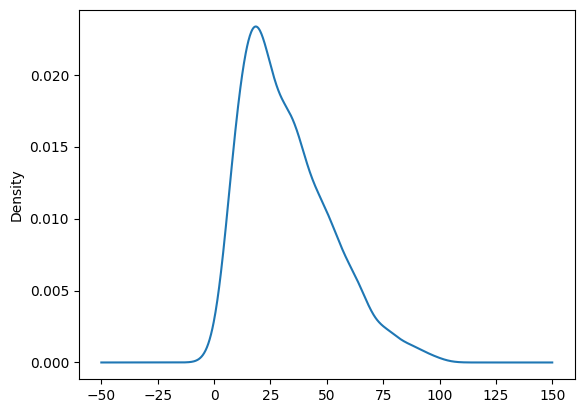

In [5]:
df['placement_exam_marks'].plot(kind='kde')

# Trimming

In [6]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [7]:
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

upper limit:  8.808933625397168
lower limit:  5.113546374602832


In [8]:
# Preview of outliers
df[(df['cgpa'] >= upper_limit) | (df['cgpa'] <= lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [9]:
# Only keeping values which are not outliers
df_new = df[(df['cgpa'] <= upper_limit) & (df['cgpa'] >= lower_limit)]

In [10]:
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [11]:
print('Original dataset :',df.shape)
print('After Removing Outliers : ',df_new.shape)

Original dataset : (1000, 3)
After Removing Outliers :  (995, 3)


In [12]:
df_new.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


<Axes: >

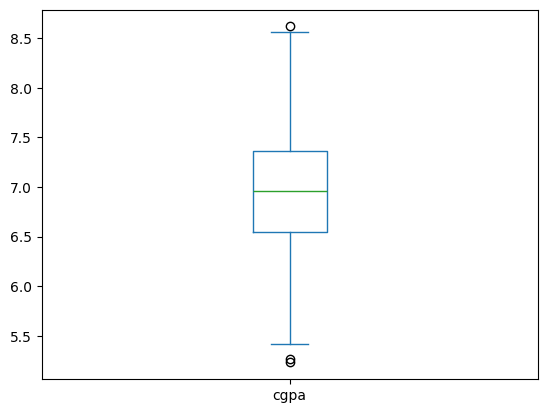

In [13]:
df_new['cgpa'].plot(kind='box')

# Capping

In [14]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [15]:
new_df = df['cgpa'].clip(lower=lower_limit, upper=upper_limit)

In [16]:
new_df.shape

(1000,)

In [17]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961240
std,0.615898
min,4.890000
25%,6.550000
50%,6.960000
75%,7.370000
max,9.120000


In [18]:
new_df.describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


<Axes: ylabel='cgpa'>

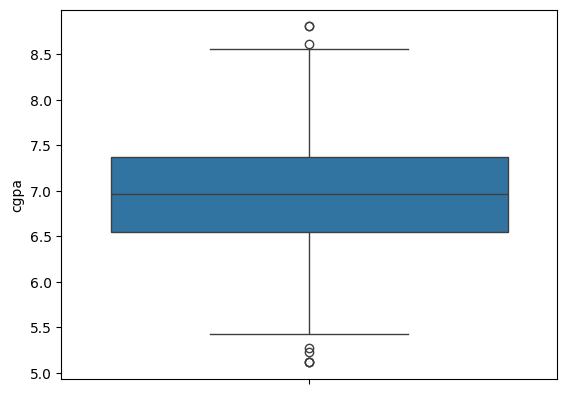

In [19]:
sns.boxplot(new_df)

### The reason is not clear why it is showing outliers in box plot, even after removing them as we can see in describe method.